# Predicting the Likelihood of E-Signing a Loan Based on Financial History

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/financial_data.csv")
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [4]:
df.groupby('e_signed').describe()

entry_id                                                    \
            count          mean           std        min        25%   
e_signed                                                              
0          8269.0  5.589410e+06  2.579921e+06  1111398.0  3372511.0   
1          9639.0  5.603470e+06  2.547525e+06  1111600.0  3386786.0   

                                              age             ...  \
                50%        75%        max   count       mean  ...   
e_signed                                                      ...   
0         5613386.0  7818934.0  9999421.0  8269.0  44.258798  ...   
1         5604204.0  7797202.5  9999874.0  9639.0  41.948750  ...   

         ext_quality_score_2           inquiries_last_month            \
                         75%       max                count      mean   
e_signed                                                                
0                   0.732586  0.961244               8269.0  6.557020   
1                   0.725916  0.966953               9639.0  6.371615   

                                              
               std  min  25%  50%  75%   max  
e_signed                                      
0         3.833565  1.0  4.0  6.0  8.0  30.0  
1         3.527570  1.0  4.0  6.0  8.0  30.0  

[2 rows x 152 columns]

In [5]:
df.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [6]:
df.isna().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

<AxesSubplot:>

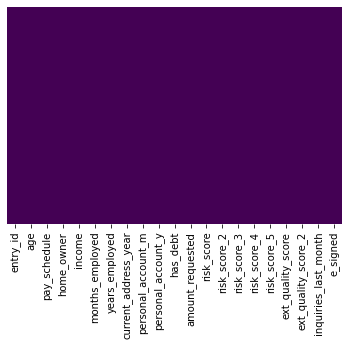

In [7]:
sns.heatmap(df.isna(),cbar=False,yticklabels=False,cmap='viridis')

## Data Visualisation & Correlation analysis

<AxesSubplot:>

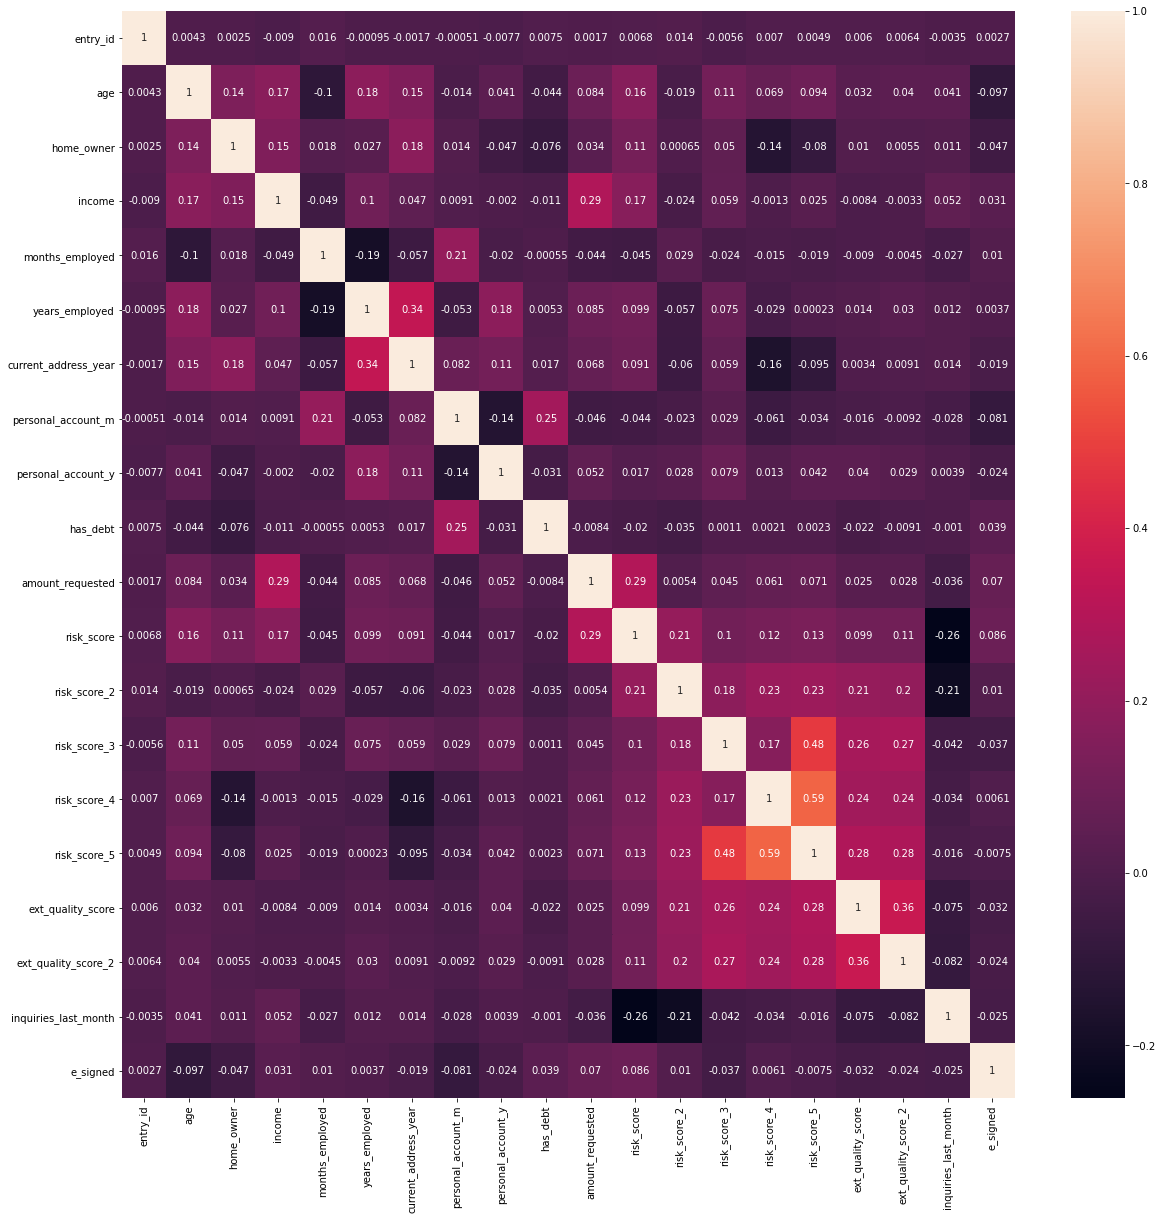

In [8]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

## DATA PREPROCESSING

In [9]:
df['personal_account_months'] = (df.personal_account_m + (df.personal_account_y * 12))
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [10]:
columns = ['personal_account_m', 'personal_account_y', 'months_employed', 'entry_id']
df.drop(columns, axis=1, inplace=True)
df.head()

,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [11]:
df.pay_schedule.value_counts()

bi-weekly       10716
weekly           3696
semi-monthly     2004
monthly          1492
Name: pay_schedule, dtype: int64

In [12]:
dummies = pd.get_dummies(df.pay_schedule)
dummies

,bi-weekly,monthly,semi-monthly,weekly
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
17903,0,1,0,0
17904,1,0,0,0
17905,0,0,0,1
17906,1,0,0,0


In [13]:
merged = pd.concat([df, dummies], axis='columns')
merged.head()

,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,bi-weekly,monthly,semi-monthly,weekly
0,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,...,0.515977,0.580918,0.380918,10,1,30,1,0,0,0
1,61,weekly,0,3180,6,3,1,600,30150,0.738510,...,0.826402,0.730720,0.630720,9,0,86,0,0,0,1
2,23,weekly,0,1540,0,0,1,450,34550,0.642993,...,0.762284,0.531712,0.531712,7,0,19,0,0,0,1
3,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,...,0.778831,0.792552,0.592552,8,1,86,1,0,0,0
4,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,...,0.665523,0.744634,0.744634,12,0,98,0,0,1,0


In [14]:
final = merged.drop(['pay_schedule','monthly'], axis='columns')
final.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,bi-weekly,semi-monthly,weekly
0,40,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30,1,0,0
1,61,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86,0,0,1
2,23,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19,0,0,1
3,40,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86,1,0,0
4,33,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

X = final.drop('e_signed', axis='columns')
y = final.e_signed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## MODEL BUILDING

### 1. Logistic Regression

In [17]:
model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5806811836962591

### 2. Support Vector Machine (SVM)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5834729201563372

### 3. Random Forest

In [20]:
model = RandomForestClassifier(n_estimators=1500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6303740926856505

## GridSearchCV

In [41]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        } 
    }, 
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }     
}

In [43]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [44]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.598564,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.586598,{'n_estimators': 10}
2,logistic_regression,0.573833,{'C': 1}
